In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 80
params = {'legend.fontsize': 'large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'large',
         'axes.titlesize': 'large',
         'xtick.labelsize': 'large',
         'ytick.labelsize': 'large',
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
import emulator

In [21]:
hod_names = ['M_sat', 'alpha', 'M_cut', 'sigma_logM', 'v_bc', 'v_bs', 'c_vir', 'f', 'f_env', 'delta_env', 'sigma_env']
hods_truth = np.loadtxt('../tables/HOD_test_np11_n1000_new_f_env.dat')

cosmo_names = ['Omega_m', 'Omega_b', 'sigma_8', 'h', 'n_s', 'N_eff', 'w']
cosmos_truth = np.loadtxt('../tables/cosmology_camb_test_box_full.dat')

In [22]:
cosmo, hod = 0, 0

hod_truth = hods_truth[hod]
cosmo_truth = cosmos_truth[cosmo]

In [24]:
print(len(hods_truth))
print(len(cosmos_truth))

1000
7


In [29]:
cosmos_test = np.loadtxt('../tables/cosmology_camb_test_box_full.dat')
hods_test = np.loadtxt('../tables/HOD_test_np11_n1000_new_f_env.dat')
hods_test[:, 0] = np.log10(hods_test[:, 0])
hods_test[:, 2] = np.log10(hods_test[:, 2])

In [7]:
for i in range(len(hod_names)):
    vals = hods_truth[:,i]
    print(f'{hod_names[i]}: {hod_truth[i]} \n\t bounds: [{min(vals)}, {max(vals)}]')

M_sat: 171109700000000.0 
	 bounds: [63104430000000.0, 314669400000000.0]
alpha: 1.108724 
	 bounds: [0.2005406, 1.798676]
M_cut: 68993610000.0 
	 bounds: [10010250000.0, 50061300000000.0]
sigma_logM: 0.5699212 
	 bounds: [0.05086696, 0.5999472]
v_bc: 0.2785511 
	 bounds: [0.0002834673, 0.699961]
v_bs: 0.9223624 
	 bounds: [0.2028271, 1.998698]
c_vir: 1.341984 
	 bounds: [0.2008345, 1.997492]
f: 1.10162 
	 bounds: [0.5005477, 1.499776]
f_env: 0.1879146 
	 bounds: [-0.2981694, 0.2989349]
delta_env: 0.8667378 
	 bounds: [0.5016521, 1.999972]
sigma_env: 0.734356 
	 bounds: [0.100522, 0.9998796]


In [30]:
for i in range(len(cosmo_names)):
    vals = cosmos_truth[:,i]
    print(f'{cosmo_names[i]}: {cosmo_truth[i]} \n\t bounds: [{min(vals)}, {max(vals)}]')

Omega_m: 0.327876 
	 bounds: [0.278009, 0.327876]
Omega_b: 0.0581827 
	 bounds: [0.0396483, 0.0581827]
sigma_8: 0.694428 
	 bounds: [0.694428, 0.907786]
h: 0.632317 
	 bounds: [0.632317, 0.732317]
n_s: 0.980515 
	 bounds: [0.944515, 0.980515]
N_eff: 2.95 
	 bounds: [2.95, 3.95]
w: -0.726513 
	 bounds: [-1.26651, -0.726513]


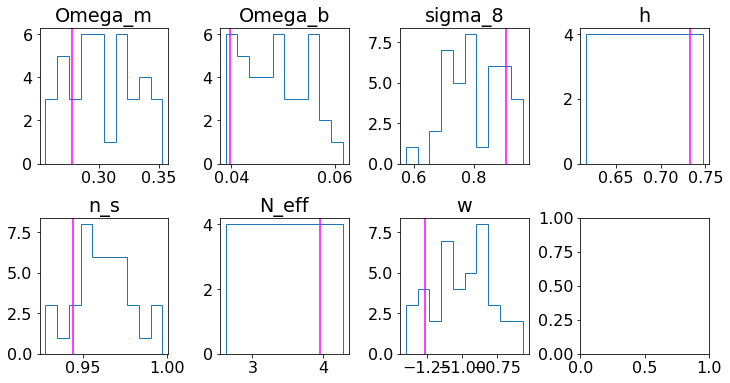

In [17]:
#for i in range(len(cosmo_names)):
cosmo_hl = 4
nrows = 2
ncols = 4
fig, axarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols,3*nrows))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
count = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axarr[i][j]
        if count>=len(cosmo_names):
            break
        vals = cosmos_train[:, count]
        title = cosmo_names[count]
        val_hl = cosmos_test[cosmo_hl, count]
        
        ax.set_title(title)
        ax.hist(vals, histtype='step')
        ax.axvline(val_hl, color='magenta')
        count += 1

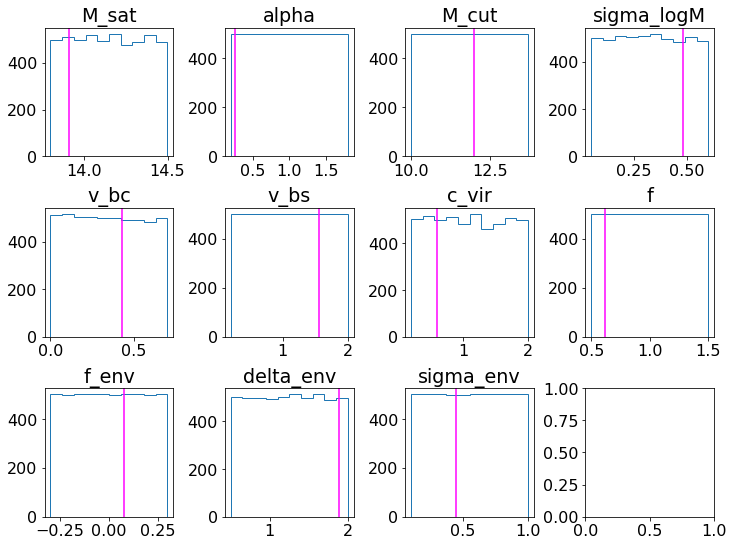

In [42]:
#for i in range(len(cosmo_names)):
hod_hl = 4
nrows = 3
ncols = 4
fig, axarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols,3*nrows))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
count = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axarr[i][j]
        if count>=len(hod_names):
            break
        vals = hods_train[:, count]
        title = hod_names[count]
        val_hl = hods_test[hod_hl, count]
        
        ax.set_title(title)
        ax.hist(vals, histtype='step')
        ax.axvline(val_hl, color='magenta')
        count += 1